## Подготовительные упражнения к проекту

In [1]:
import pandas as pd
import re
import datetime

In [2]:
df0 = pd.read_csv('main_task.csv')
df = df0.copy()

In [3]:
# сколько вариантов непустых значений в столбце Price Range
b = df['Price Range'].value_counts()
len(b)

3

In [4]:
# сколько средних значений
b['$$ - $$$']

18412

In [5]:
# сколько городов
len(df['City'].value_counts())

31

In [6]:
# сколько типов кухонь -- разбить и посчитать
df1 = df.loc[:, ['Restaurant_id', 'Cuisine Style']]
df1 = df1.dropna()
df1['Cuisine Style'] = df1['Cuisine Style'].apply(lambda x: x[1:-1].replace("'", '').split(', ')) # убираем передние и задние кавычки/ убираем кавычки у каждого слова/ делаем список из значений
cuisine = df1['Cuisine Style'].explode().value_counts() # разбиваем по кухням/ считаем количество упоминаний каждой/ считаем количество разных кухонь
cuisine.count() # считаем количество разных кухонь

125

In [7]:
# какая кухня наиболее часто встречается
print(cuisine.index[0])

Vegetarian Friendly


In [8]:
# среднее количество кухонь на 1 ресторан. Если NaN, то 1. Округлить до 1
df2 = df.loc[:, ['Restaurant_id', 'Cuisine Style']] # выбираем 2 колонки - рестораны и кухни
df2.loc[:, 'Cuisine Style'].fillna('1', inplace = True) # заменяем отсутствующие значения любой строкой 
# убираем передние и задние кавычки/ убираем кавычки у каждого слова/ делаем список из значений/ считаем количество кухонь в ресторане
df2['Cuisine Style'] = df2.loc[:, 'Cuisine Style'].apply(lambda x: len(x[1:-1].replace("'", '').split(', ')))
round(df2['Cuisine Style'].mean(), 1) # считаем среднее значение количества кухонь по столбцу/ округляем до 1

2.6

In [9]:
# самый ранний отзыв
df3 = df.loc[:, 'Reviews'] # выбираем столбец с отзывами
df3 = df3.apply(lambda x: re.findall(r'\d{2}/\d{2}/\d{4}', x)) # выбираем даты отзывов
df3 = df3[df3.astype(bool)] # убираем пустые списки
df3 = df3.apply(lambda x: x[0]) # выбираем первую дату
df3 = pd.to_datetime(df3, format="%m/%d/%Y") # переводим данные столбца в формат даты
print(df3.max().date()) # находим последнюю дату

2018-02-26


In [10]:
# макс. количество дней между отзывами
df4 = df.loc[:, ['Restaurant_id', 'Reviews']] # выбираем столбец с отзывами
df4['Reviews'] = df4.loc[:, 'Reviews'].map(lambda x: re.findall(r'\d{2}/\d{2}/\d{4}', x)) # выбираем даты отзывов
df4 = df4[df4['Reviews'].apply(len) > 0] # удаляем пустые списки
df4['a'] = df4['Reviews'].apply(lambda x: x[0]) # создаём столбец с последней датой
df4['b'] = df4['Reviews'].apply(lambda x: x[-1]) # создаём столбец с предпоследней датой
df4['a'] = pd.to_datetime(df4['a'], format="%m/%d/%Y") # переводим данные столбца a в формат даты
df4['b'] = pd.to_datetime(df4['b'], format="%m/%d/%Y") # переводим данные столбца b в формат даты
df4['c'] = df4.a - df4.b # создаём столбец с разницей между отзывами
print(df4['c'].max()) # находим максимальной разницей

3207 days 00:00:00


## Содержание фрейма

**Restaurant_id** - идентификационный номер ресторана / сети ресторанов  
**City** - город, в котором находится ресторан  
**Cuisine Style** - кухня или кухни, к которым можно отнести блюда, предлагаемые в ресторане  
**Ranking** - место, которое занимает данный ресторан среди всех ресторанов своего города  
**Rating** - рейтинг ресторана по данным TripAdvisor (именно это значение должна была предсказывать модель)  
**Price Range** - диапазон цен в ресторане  
**Number of Reviews** - количетво отзывов в ресторане  
**Reviews** - данные о двух отзывах, которые отображаются на сайте ресторана  
**URL_TA** - URL страницы ресторана на TripAdvisor  
**ID_TA** - идентификатор ресторана в базе данных TripAdvisor

## Загрузка Pandas и очистка данных

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [12]:
# количество пропущенных значений в каждом столбце
df.isnull().sum()

Restaurant_id            0
City                     0
Cuisine Style         9283
Ranking                  0
Rating                   0
Price Range          13886
Number of Reviews     2543
Reviews                  0
URL_TA                   0
ID_TA                    0
dtype: int64

В целевой переменной Rating нет пропущенных значений, поэтому предобработка выполняется только в переименовании названий столбцов для удобства.

Заменим в названиях колонок пробелы подчёркиванием.

In [13]:
df.columns = df.columns.str.replace(" ", "_")

In [14]:
df.head()

,Restaurant_id,City,Cuisine_Style,Ranking,Rating,Price_Range,Number_of_Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


## Напишем функции для обработки данных

In [15]:
# составим функцию для вывода начальных данных
def test(df, colx):
    # где df - фрейм данных, colx - название анализируемой колонки
    dfx = df[colx]
    a1 = pd.DataFrame(dfx.value_counts()) # создание таблицы с данными по столбцу
    a1['percent'] = round((a1[colx] * 100 / len(df)), 5) # создание таблицы с процентным соотношением данных по столбцу
    b1 = round(abs(len(df) - a1[colx].sum()), 2) # вычисляем количество незаполненных данных
    c1 = round(abs(100 - a1.percent.sum()), 2) # вычисляем процент незаполненных данных
    print(a1), print(f'Количество незаполненных значений: {b1} ~ {c1}%.'), df.loc[:, [colx]].info()
    if dfx.dtypes != 'O': # если столбец числовой, строим гистограмму распределения
        dfx.hist()
# составим функцию для обработки данных
def objekt(df, colx): # функция для замены отсутствующих значений на наиболее часто встречающиеся или,
    # при небольшой разнице в количестве значений, на любое из двух наиболее часто встречающихся.
    # где df - фрейм данных, colx - название анализируемой колонки
    dfx = df[colx]
    a = pd.DataFrame(dfx.value_counts())
    a['percent'] = round((a[colx] * 100 / len(df)), 2)
    u = a.percent.values[0] - a.percent.values[1]
    u1 = [a.index[0], a.index[1]]
    if dfx.dtypes == 'O' and u > 15:
    # заполнение строковых столбцов: когда строковые столбцы имеют пропущенные значения и значения NaN
        dfx.fillna(dfx.mode().values[0], inplace = True)
    elif dfx.dtypes == 'O' and u <= 15:
        dfx.fillna(random.choice(u1), inplace = True)
    # заполнение числовых столбцов: когда числовые столбцы имеют пропущенные значения и значения NaN
    elif dfx.dtypes != 'O' and u > 15:
        dfx.fillna(dfx.value_counts().index[0], inplace = True)
    else:
        dfx.fillna(random.choice(u1), inplace = True)
    b = pd.DataFrame(dfx.value_counts()) # создание таблицы с данными по столбцу
    b['percent'] = round((b[colx] * 100 / len(df)), 2) # создание таблицы с процентным соотношением данных по столбцу
    return b
def get_boxplot(df, colx, coly, n): # построение графиков сравнения
    # где df - фрейм данных, colx - название анализируемой колонки, coly - название колонки для сравнения, n - выборка
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x = colx, y = coly,
            data = df.loc[df.loc[:, colx].isin(df.loc[:, colx].value_counts().index[:n])],
            ax = ax)
    plt.xticks(rotation = 45)
    ax.set_title('Boxplot for ' + colx)
    plt.show()

## Рассмотрим подробнее каждый столбец

### Restaurant_id - идентификационный номер ресторана / сети ресторанов

In [16]:
test(df, 'Restaurant_id')

          Restaurant_id  percent
id_871               18   0.0450
id_436               18   0.0450
id_227               18   0.0450
id_633               18   0.0450
id_321               17   0.0425
...                 ...      ...
id_11542              1   0.0025
id_6574               1   0.0025
id_15869              1   0.0025
id_14510              1   0.0025
id_11004              1   0.0025

[11909 rows x 2 columns]
Количество незаполненных значений: 0 ~ 0.0%.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Restaurant_id  40000 non-null  object
dtypes: object(1)
memory usage: 312.6+ KB


Пропущенных значений нет. Есть преобладающие значения, но это, возможно, рестораны одной сети.

Добавим колонку, где обозначим сетевые рестораны как 1, а встречающиеся 1 раз, как 0.

In [17]:
a1 = df.Restaurant_id.value_counts() # составим список данных по столбцу
Net_rest = a1[a1 > 1].index.tolist() # составим список значений > 1
df['Net_rest'] = df[df.Restaurant_id.isin(Net_rest)].Restaurant_id.apply(lambda x: 1) # создадим колонку со значениями 1 на месте сетевых ресторанов
df.Net_rest = df['Net_rest'].fillna(0) # в созданной колонке пустые значения заменим на 0

#### Проверим данные

     Net_rest  percent
1.0     35295  88.2375
0.0      4705  11.7625
Количество незаполненных значений: 0 ~ 0.0%.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Net_rest  40000 non-null  float64
dtypes: float64(1)
memory usage: 312.6 KB


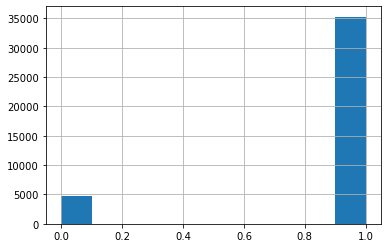

In [18]:
test(df, 'Net_rest')

Отметим, что сетевых ресторанов большинство (> 88%).

### City - город, в котором находится ресторан

In [19]:
test(df, 'City')

            City  percent
London      5757  14.3925
Paris       4897  12.2425
Madrid      3108   7.7700
Barcelona   2734   6.8350
Berlin      2155   5.3875
Milan       2133   5.3325
Rome        2078   5.1950
Prague      1443   3.6075
Lisbon      1300   3.2500
Vienna      1166   2.9150
Amsterdam   1086   2.7150
Brussels    1060   2.6500
Hamburg      949   2.3725
Munich       893   2.2325
Lyon         892   2.2300
Stockholm    820   2.0500
Budapest     816   2.0400
Warsaw       727   1.8175
Dublin       673   1.6825
Copenhagen   659   1.6475
Athens       628   1.5700
Edinburgh    596   1.4900
Zurich       538   1.3450
Oporto       513   1.2825
Geneva       481   1.2025
Krakow       443   1.1075
Oslo         385   0.9625
Helsinki     376   0.9400
Bratislava   301   0.7525
Luxembourg   210   0.5250
Ljubljana    183   0.4575
Количество незаполненных значений: 0 ~ 0.0%.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 1 columns):
 #   Column  No

Все значения заполнены. Пропусков нет. Грамматических ошибок и неточностей в названиях городов нет.

Сделаем из этой колонки dummy- переменные.

In [20]:
df['City_new'] = df['City'] # создадим копию колонки для разбивки
df = pd.get_dummies(df, columns = ['City_new', ], drop_first = False) # разобъём новую колонку на dummy переменные

In [21]:
df.columns

Index(['Restaurant_id', 'City', 'Cuisine_Style', 'Ranking', 'Rating',
       'Price_Range', 'Number_of_Reviews', 'Reviews', 'URL_TA', 'ID_TA',
       'Net_rest', 'City_new_Amsterdam', 'City_new_Athens',
       'City_new_Barcelona', 'City_new_Berlin', 'City_new_Bratislava',
       'City_new_Brussels', 'City_new_Budapest', 'City_new_Copenhagen',
       'City_new_Dublin', 'City_new_Edinburgh', 'City_new_Geneva',
       'City_new_Hamburg', 'City_new_Helsinki', 'City_new_Krakow',
       'City_new_Lisbon', 'City_new_Ljubljana', 'City_new_London',
       'City_new_Luxembourg', 'City_new_Lyon', 'City_new_Madrid',
       'City_new_Milan', 'City_new_Munich', 'City_new_Oporto', 'City_new_Oslo',
       'City_new_Paris', 'City_new_Prague', 'City_new_Rome',
       'City_new_Stockholm', 'City_new_Vienna', 'City_new_Warsaw',
       'City_new_Zurich'],
      dtype='object')

### Cuisine Style - кухня или кухни, к которым можно отнести блюда, предлагаемые в ресторане

In [22]:
test(df, 'Cuisine_Style')

                                                    Cuisine_Style  percent
['Italian']                                                  1032   2.5800
['French']                                                    805   2.0125
['Spanish']                                                   695   1.7375
['French', 'European']                                        405   1.0125
['Cafe']                                                      403   1.0075
...                                                           ...      ...
['Asian', 'Korean', 'Street Food', 'Fast Food']                 1   0.0025
['Italian', 'Bar', 'Pizza', 'Delicatessen', 'Pub']              1   0.0025
['Pizza', 'Italian', 'Mediterranean', 'Vegetari...              1   0.0025
['Cafe', 'American', 'Danish', 'Vegetarian Frie...              1   0.0025
['Fast Food', 'Turkish', 'Mediterranean', 'Midd...              1   0.0025

[9007 rows x 2 columns]
Количество незаполненных значений: 9283 ~ 23.21%.
<class 'pandas.core.frame

Данные заполнены строками. Пропусков 23%. Для разбивки строки данных на списки, необходимо заполнить строки без значений.  
Для этого необходима обработка остальных столбцов, так ччто пока отложим работу с данными этого.

Найдём наиболее часто встречающийся тип кухонь для замены отсутствующих значений

In [23]:
#df1 = df.loc[:, ['Restaurant_id', 'Cuisine Style']]
#df1 = df1.dropna()
#df1['Cuisine Style'] = df1['Cuisine Style'].apply(lambda x: x[1:-1].replace("'", '').split(', ')) # убираем передние и задние кавычки/ убираем кавычки у каждого слова/ делаем список из значений

### Ranking - место, которое занимает данный ресторан среди всех ресторанов своего города

         Ranking  percent
1080.0        19   0.0475
431.0         18   0.0450
491.0         18   0.0450
437.0         18   0.0450
345.0         18   0.0450
...          ...      ...
16095.0        1   0.0025
14765.0        1   0.0025
12661.0        1   0.0025
11635.0        1   0.0025
9606.0         1   0.0025

[11936 rows x 2 columns]
Количество незаполненных значений: 0 ~ 0.0%.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ranking  40000 non-null  float64
dtypes: float64(1)
memory usage: 312.6 KB


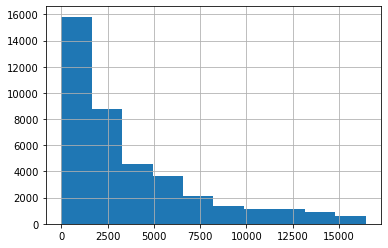

In [24]:
test(df, 'Ranking')

Все данные заполнены, пропусков нет. Данные представлены большими числами. Для работы модели необходимо нормализовать значения.

In [25]:
from sklearn import preprocessing
from sklearn.preprocessing import QuantileTransformer # импортируем библиотеку со способом нормализации

scaler = preprocessing.QuantileTransformer()
float_array = df['Ranking'].values.astype(float).reshape(-1 , 1) # создаём список из столбца
df['Ranking'] = scaler.fit_transform(float_array) # заменим данные в столбце на нормализованные

df.head() # проверим изменения

,Restaurant_id,City,Cuisine_Style,Ranking,Rating,Price_Range,Number_of_Reviews,Reviews,URL_TA,ID_TA,...,City_new_Munich,City_new_Oporto,City_new_Oslo,City_new_Paris,City_new_Prague,City_new_Rome,City_new_Stockholm,City_new_Vienna,City_new_Warsaw,City_new_Zurich
0,id_5569,Paris,"['European', 'French', 'International']",0.769644,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,...,0,0,0,1,0,0,0,0,0,0
1,id_1535,Stockholm,NaN,0.374575,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,...,0,0,0,0,0,0,1,0,0,0
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",0.094094,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,...,0,0,0,0,0,0,0,0,0,0
3,id_3456,Berlin,NaN,0.629685,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,...,0,0,0,0,0,0,0,0,0,0
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",0.165165,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,...,1,0,0,0,0,0,0,0,0,0


### Rating - рейтинг ресторана по данным TripAdvisor (именно это значение должна была предсказывать модель)

     Rating  percent
4.0   13692  34.2300
4.5   10929  27.3225
3.5    6824  17.0600
5.0    3879   9.6975
3.0    2955   7.3875
2.5     915   2.2875
2.0     466   1.1650
1.0     201   0.5025
1.5     139   0.3475
Количество незаполненных значений: 0 ~ 0.0%.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rating  40000 non-null  float64
dtypes: float64(1)
memory usage: 312.6 KB


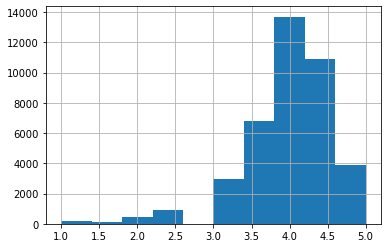

In [26]:
test(df, 'Rating')

Пропусков нет. Данные введены корректно и без ошибок - значения распределены от 1 до 5 с шагом 0.5. Оставляем эти данные без изменений.

### Price Range - диапазон цен в ресторане

In [27]:
test(df, 'Price_Range')

          Price_Range  percent
$$ - $$$        18412  46.0300
$                6279  15.6975
$$$$             1423   3.5575
Количество незаполненных значений: 13886 ~ 34.72%.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Price_Range  26114 non-null  object
dtypes: object(1)
memory usage: 312.6+ KB


Пропусков достаточно много - почти 35%. Данные распределены без выбросов. Ошибок в данных нет.

Данные заменим на числовые, согласно величине диапазона.

In [28]:
price_dict = {'$': 1, '$$ - $$$': 2, '$$$$': 3} # создадим словарь для преобразования значений уровня цен
df['Price_Range'].replace(price_dict, inplace=True) # заменим значения в колонке

Заполним пропущенные значения. Эти данные должны перекликаться с расположением ресторана (т.к. в более населённых городах цены выше)  
и принадлежностью ресторана к сети (т.к. в сетевых ресторанах цены устанавливаются по своим схемам).
Наиболее населённым считаем город с большим количеством ресторанов.

In [29]:
# удалить столбцы, содержащие данные типа object
# заполнить пропущенные значения нулём или средним арифметическим
#df1 = df.drop([col for col in df.columns if df[col].dtype == 'O'],axis=1)
df1 = df.drop(df.select_dtypes(include=['object']), axis = 1)
df1 = df1.fillna(df1.mean())
df1.head()

,Ranking,Rating,Price_Range,Number_of_Reviews,Net_rest,City_new_Amsterdam,City_new_Athens,City_new_Barcelona,City_new_Berlin,City_new_Bratislava,...,City_new_Munich,City_new_Oporto,City_new_Oslo,City_new_Paris,City_new_Prague,City_new_Rome,City_new_Stockholm,City_new_Vienna,City_new_Warsaw,City_new_Zurich
0,0.769644,3.5,2.000000,194.0,1.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0.374575,4.0,1.814046,10.0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0.094094,4.5,3.000000,688.0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.629685,5.0,1.814046,3.0,1.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0.165165,4.0,2.000000,84.0,1.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Ranking              40000 non-null  float64
 1   Rating               40000 non-null  float64
 2   Price_Range          40000 non-null  float64
 3   Number_of_Reviews    40000 non-null  float64
 4   Net_rest             40000 non-null  float64
 5   City_new_Amsterdam   40000 non-null  uint8  
 6   City_new_Athens      40000 non-null  uint8  
 7   City_new_Barcelona   40000 non-null  uint8  
 8   City_new_Berlin      40000 non-null  uint8  
 9   City_new_Bratislava  40000 non-null  uint8  
 10  City_new_Brussels    40000 non-null  uint8  
 11  City_new_Budapest    40000 non-null  uint8  
 12  City_new_Copenhagen  40000 non-null  uint8  
 13  City_new_Dublin      40000 non-null  uint8  
 14  City_new_Edinburgh   40000 non-null  uint8  
 15  City_new_Geneva      40000 non-null 

In [31]:
df['City'].dtype

dtype('O')

# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели

In [32]:
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
X = df1.drop('Rating', axis = 1)
y = df1['Rating']

In [33]:
# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split

In [34]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Создаём, обучаем и тестируем модель

In [35]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [36]:
# Создаём модель
regr = RandomForestRegressor(n_estimators=100)

# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)

In [37]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.2179415


In [38]:
df

,Restaurant_id,City,Cuisine_Style,Ranking,Rating,Price_Range,Number_of_Reviews,Reviews,URL_TA,ID_TA,...,City_new_Munich,City_new_Oporto,City_new_Oslo,City_new_Paris,City_new_Prague,City_new_Rome,City_new_Stockholm,City_new_Vienna,City_new_Warsaw,City_new_Zurich
0,id_5569,Paris,"['European', 'French', 'International']",0.769644,3.5,2.0,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,...,0,0,0,1,0,0,0,0,0,0
1,id_1535,Stockholm,NaN,0.374575,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,...,0,0,0,0,0,0,1,0,0,0
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",0.094094,4.5,3.0,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,...,0,0,0,0,0,0,0,0,0,0
3,id_3456,Berlin,NaN,0.629685,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,...,0,0,0,0,0,0,0,0,0,0
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",0.165165,4.0,2.0,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,id_499,Milan,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",0.133467,4.5,2.0,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,...,0,0,0,0,0,0,0,0,0,0
39996,id_6340,Paris,"['French', 'American', 'Bar', 'European', 'Veg...",0.811442,3.5,2.0,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,...,0,0,0,1,0,0,0,0,0,0
39997,id_1649,Stockholm,"['Japanese', 'Sushi']",0.396797,4.5,NaN,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,...,0,0,0,0,0,0,1,0,0,0
39998,id_640,Warsaw,"['Polish', 'European', 'Eastern European', 'Ce...",0.169770,4.0,2.0,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,...,0,0,0,0,0,0,0,0,1,0
